# Análise dos Dados obtidos

## Limpar os dados

In [312]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [313]:
import os

path = os.getcwd().replace('/data_analysis', '') + '/data.txt'

In [314]:
import random

lista = list()
for i in range(0,10):
    lista.append(round(random.uniform(2.0, 5.0), 2))

print(lista)


[3.09, 2.47, 3.29, 4.78, 4.04, 3.05, 4.16, 2.57, 4.42, 2.77]


In [315]:
# f = open(path)


lines = list()
for data in f:
    lines.append(data)

print(lines)

# TAMPOP e MAX_INFO_LEN
TAMPOP = lines[1].split('\t')[0].split(' ')[2]
MAX_INFO_LEN = lines[1].split('\t')[1].split(' ')[2]

# fitness function
fitness = list()
for gen in range(0,100):
    try:
        fitness.append(lines[lines.index('Generation: ' + str(gen) + '\n') + 2].split())
    except ValueError:
        gen -= 1
        break

print(fitness)
print(gen)

f.close()


ValueError: I/O operation on closed file.

In [ ]:
# eixo X
X = list()
for i in range(0,gen + 1):
    X.append(i)

X = np.array(X)
print(X)

# eixo Y (em andamento ainda)

y0 = list()
y1 = list()
y2 = list()
for fit in fitness:
    print(fit)
    y0.append(fit[0])
    y1.append(fit[1])
    y2.append(fit[2])

print(y0)
print(y1)
print(y2)

[0 1 2]
['2.90', '2.50', '3.00', '2.90', '2.70', '3.00', '3.00', '2.90', '2.90', '1.30']
['3.90', '3.50', '4.00', '3.90', '3.70', '3.00', '3.00', '2.90', '2.90', '1.30']
['4.90', '4.50', '5.00', '4.90', '4.70', '5.00', '3.00', '2.90', '2.90', '1.30']
['2.90', '3.90', '4.90']
['2.50', '3.50', '4.50']
['3.00', '4.00', '5.00']


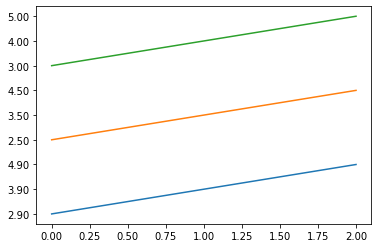

In [ ]:
plt.plot(X, y0)
plt.plot(X, y1)
plt.plot(X, y2)
plt.show()